# Covid-19 mortality prediction based on clinical data

In [1]:
# Importing packages for:
# Importing and analysis
import requests
import pandas as pd 
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Machine learning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

## 1. Data Importing, exploration and cleaning

### 1.1. Covid-19 mortality dataset

In [2]:
# Import Covid-19 mortality dataset and name it covid_mortality
covid_mortality = pd.read_csv("covid_dataset_original.csv") 
covid_mortality

age gender   race  death  Time_from_COVID_positive_to_death_in_days  \
0     89+      F  Black      1                                   0.877083   
1     89+      F  Black      1                                   9.761806   
2     89+      F  Other      0                                        NaN   
3     89+      F  Black      0                                        NaN   
4     89+      M  Other      0                                        NaN   
...   ...    ...    ...    ...                                        ...   
4308   19      M  Other      0                                        NaN   
4309   19      F  Other      0                                        NaN   
4310   18      M  Black      0                                        NaN   
4311   18      F  Black      0                                        NaN   
4312   18      F  Other      0                                        NaN   

      ventilator  albumin  diastolicBP  systolicBP    cr  ...    bmi  glucose  \
0              0      3.9           70         128  2.43  ...  25.64    184.0   
1              0      3.5           97         124  1.99  ...  25.52    230.0   
2              0      3.8           61         126  2.60  ...  15.14    102.0   
3              0      3.6           56         113  1.40  ...  19.19    206.0   
4              0      3.7           62         114  1.79  ...  18.78    237.0   
...          ...      ...          ...         ...   ...  ...    ...      ...   
4308           0      4.4           64         106  1.00  ...  43.92      NaN   
4309           0      3.6           68         100  0.42  ...    NaN      NaN   
4310           0      5.7           65         104  0.75  ...  20.84    126.0   
4311           0      4.9           75         114  1.18  ...  24.97    594.0   
4312           0      NaN           83         138   NaN  ...  26.26      NaN   

      direct_bili  total_bili  indirect_bili  creatine_kinase   pro_bnp  \
0          0.1999         0.3         0.1001            923.0       NaN   
1          0.4000         1.0         0.6000            121.0   572.000   
2          0.1999         0.5         0.3001            532.0  1363.000   
3          0.2000         0.4         0.2000            100.0  1982.000   
4          0.1999         0.2         0.0001              NaN       NaN   
...           ...         ...            ...              ...       ...   
4308       0.1999         0.3         0.1001            223.0    59.999   
4309       0.1999         0.2         0.0001             47.0    88.000   
4310       0.1999         0.4         0.2001            100.0    59.999   
4311       0.2000         0.5         0.3000              NaN       NaN   
4312       0.3000         0.8         0.5000              NaN       NaN   

      potassium  charlson_score  ct_value  
0           NaN               5       NaN  
1           5.4               6      34.0  
2           4.7               0       NaN  
3           4.4               5       NaN  
4           5.4               5       NaN  
...         ...             ...       ...  
4308        4.0               2       NaN  
4309        3.9               0       NaN  
4310        4.5               0       NaN  
4311        4.5               0       NaN  
4312        4.1               0       NaN  

[4313 rows x 53 columns]

In [3]:
# Data exploration
# What shape are the data in- how many rows (patients) and columns (clinical information)
covid_mortality.shape 

(4313, 53)

In [4]:
# Look at the columns and what types of data they are in them
covid_mortality.dtypes 

age                                           object
gender                                        object
race                                          object
death                                          int64
Time_from_COVID_positive_to_death_in_days    float64
ventilator                                     int64
albumin                                      float64
diastolicBP                                    int64
systolicBP                                     int64
cr                                           float64
ddimer                                       float64
egfr                                         float64
eosinophil                                   float64
ferritin                                     float64
fibrinogen                                   float64
hgb                                          float64
inr                                          float64
lymphocyte                                   float64
neutrophil                                   f

In [5]:
# Age should be integer to be useful at the analyses I want to do - I need to fix this:
covid_mortality = covid_mortality.replace('89+', 89) # I replace the age 89+ with 89
covid_mortality['age'] = covid_mortality['age'].astype(int) # and make the column values to be full numbers = integers

In [6]:
# Check that age column is now integer
covid_mortality['age'].dtypes 

dtype('int32')

In [7]:
# Sort values - insight into some variables - if the gender affects death from Covid-19 (there has been quite a bit published on that)
covid_mortality.sort_values(["gender", "death"]) 

age gender      race  death  Time_from_COVID_positive_to_death_in_days  \
2      89      F     Other      0                                        NaN   
3      89      F     Black      0                                        NaN   
8      89      F     Black      0                                        NaN   
9      89      F  Declined      0                                        NaN   
14     89      F     Black      0                                        NaN   
...   ...    ...       ...    ...                                        ...   
4117   30      M     Asian      1                                  19.992361   
4160   29      M  Declined      1                                   2.529167   
4161   29      M     Black      1                                  14.934028   
4218   26      M  Declined      1                                   1.209722   
4289   21      M  Declined      1                                   1.327083   

      ventilator  albumin  diastolicBP  systolicBP    cr  ...    bmi  glucose  \
2              0      3.8           61         126  2.60  ...  15.14    102.0   
3              0      3.6           56         113  1.40  ...  19.19    206.0   
8              0      4.0           78         127  4.90  ...  26.47    173.0   
9              0      NaN           75         145  0.70  ...  15.74      NaN   
14             0      3.4           69         114  1.00  ...  16.69    192.0   
...          ...      ...          ...         ...   ...  ...    ...      ...   
4117           1      3.9           31          78  0.93  ...  30.64      NaN   
4160           1      4.2           21          57  1.00  ...  34.75    173.0   
4161           1      4.1           57         116  3.80  ...  34.86    166.0   
4218           2      2.2           72         113  3.00  ...    NaN      NaN   
4289           2      2.3           23          53  3.20  ...    NaN      NaN   

      direct_bili  total_bili  indirect_bili  creatine_kinase    pro_bnp  \
2          0.1999         0.5         0.3001            532.0   1363.000   
3          0.2000         0.4         0.2000            100.0   1982.000   
8          0.4000         0.9         0.5000              NaN        NaN   
9             NaN         NaN         0.0000              NaN        NaN   
14         0.1999         0.3         0.1001             67.0    481.000   
...           ...         ...            ...              ...        ...   
4117       0.3000         0.6         0.3000            734.0    137.000   
4160       0.3000         1.1         0.8000            547.0        NaN   
4161       0.5000         1.6         1.1000           8281.0  15000.001   
4218       0.6000         0.6         0.0000            760.0  15000.001   
4289       0.1999         0.3         0.1001           2629.0        NaN   

      potassium  charlson_score  ct_value  
2           4.7               0       NaN  
3           4.4               5       NaN  
8           4.7               3      38.2  
9           4.4               2       NaN  
14          4.1               2       NaN  
...         ...             ...       ...  
4117        4.3               2      26.3  
4160        3.9               0       NaN  
4161        3.3               3      26.2  
4218        5.8               1       NaN  
4289        5.5               0       NaN  

[4313 rows x 53 columns]

In [8]:
# Sort data from youngest to oldest patient
covid_mortality.sort_values(by='age') 

age gender      race  death  Time_from_COVID_positive_to_death_in_days  \
4312   18      F     Other      0                                        NaN   
4311   18      F     Black      0                                        NaN   
4310   18      M     Black      0                                        NaN   
4309   19      F     Other      0                                        NaN   
4308   19      M     Other      0                                        NaN   
...   ...    ...       ...    ...                                        ...   
130    89      F     Black      0                                        NaN   
129    89      M     Black      0                                        NaN   
128    89      F  Declined      1                                   2.225000   
139    89      F     Other      0                                        NaN   
0      89      F     Black      1                                   0.877083   

      ventilator  albumin  diastolicBP  systolicBP    cr  ...    bmi  glucose  \
4312           0      NaN           83         138   NaN  ...  26.26      NaN   
4311           0      4.9           75         114  1.18  ...  24.97    594.0   
4310           0      5.7           65         104  0.75  ...  20.84    126.0   
4309           0      3.6           68         100  0.42  ...    NaN      NaN   
4308           0      4.4           64         106  1.00  ...  43.92      NaN   
...          ...      ...          ...         ...   ...  ...    ...      ...   
130            0      2.8           94         129  1.00  ...  24.80    186.0   
129            0      3.5           74         124  1.09  ...  26.22    175.0   
128            0      4.0           32          64  1.40  ...  21.13    166.0   
139            0      3.4           72         131  1.70  ...  20.24    389.0   
0              0      3.9           70         128  2.43  ...  25.64    184.0   

      direct_bili  total_bili  indirect_bili  creatine_kinase    pro_bnp  \
4312       0.3000         0.8         0.5000              NaN        NaN   
4311       0.2000         0.5         0.3000              NaN        NaN   
4310       0.1999         0.4         0.2001            100.0     59.999   
4309       0.1999         0.2         0.0001             47.0     88.000   
4308       0.1999         0.3         0.1001            223.0     59.999   
...           ...         ...            ...              ...        ...   
130        0.2000         0.4         0.2000            295.0    506.000   
129        0.4000         0.9         0.5000            345.0  14177.000   
128        0.2000         0.4         0.2000           1888.0   1430.000   
139        0.1999         0.3         0.1001            164.0    815.000   
0          0.1999         0.3         0.1001            923.0        NaN   

      potassium  charlson_score  ct_value  
4312        4.1               0       NaN  
4311        4.5               0       NaN  
4310        4.5               0       NaN  
4309        3.9               0       NaN  
4308        4.0               2       NaN  
...         ...             ...       ...  
130         5.8               2       NaN  
129         5.9               1       NaN  
128         3.7               3      19.0  
139         5.0               1       NaN  
0           NaN               5       NaN  

[4313 rows x 53 columns]

In [9]:
# Sort data from oldest to youngest patient
covid_mortality.sort_values(by='age', ascending=False) 

age gender   race  death  Time_from_COVID_positive_to_death_in_days  \
0      89      F  Black      1                                   0.877083   
140    89      F  White      1                                   6.667361   
129    89      M  Black      0                                        NaN   
130    89      F  Black      0                                        NaN   
131    89      M  Black      0                                        NaN   
...   ...    ...    ...    ...                                        ...   
4302   19      F  Other      0                                        NaN   
4301   19      M  Other      0                                        NaN   
4310   18      M  Black      0                                        NaN   
4311   18      F  Black      0                                        NaN   
4312   18      F  Other      0                                        NaN   

      ventilator  albumin  diastolicBP  systolicBP    cr  ...    bmi  glucose  \
0              0      3.9           70         128  2.43  ...  25.64    184.0   
140            0      3.1           34         106  3.40  ...  26.04      NaN   
129            0      3.5           74         124  1.09  ...  26.22    175.0   
130            0      2.8           94         129  1.00  ...  24.80    186.0   
131            2      NaN           65         136   NaN  ...  24.03    167.0   
...          ...      ...          ...         ...   ...  ...    ...      ...   
4302           0      NaN           75         128   NaN  ...  30.47      NaN   
4301           1      4.3           68         122  0.90  ...  30.50      NaN   
4310           0      5.7           65         104  0.75  ...  20.84    126.0   
4311           0      4.9           75         114  1.18  ...  24.97    594.0   
4312           0      NaN           83         138   NaN  ...  26.26      NaN   

      direct_bili  total_bili  indirect_bili  creatine_kinase    pro_bnp  \
0          0.1999         0.3         0.1001            923.0        NaN   
140        0.3000         0.5         0.2000              NaN        NaN   
129        0.4000         0.9         0.5000            345.0  14177.000   
130        0.2000         0.4         0.2000            295.0    506.000   
131        0.3000         0.5         0.2000              NaN        NaN   
...           ...         ...            ...              ...        ...   
4302       0.1999         0.2         0.0001              NaN        NaN   
4301       0.3000         0.9         0.6000            302.0    127.000   
4310       0.1999         0.4         0.2001            100.0     59.999   
4311       0.2000         0.5         0.3000              NaN        NaN   
4312       0.3000         0.8         0.5000              NaN        NaN   

      potassium  charlson_score  ct_value  
0           NaN               5       NaN  
140         5.1               6       NaN  
129         5.9               1       NaN  
130         5.8               2       NaN  
131         4.5               9       NaN  
...         ...             ...       ...  
4302        4.0               0       NaN  
4301        3.7               3       NaN  
4310        4.5               0       NaN  
4311        4.5               0       NaN  
4312        4.1               0       NaN  

[4313 rows x 53 columns]

In [10]:
# Sort based on age and relation to death from Covid-19
covid_mortality.sort_values(["age", "death"]) 

age gender                     race  death  \
4310   18      M                    Black      0   
4311   18      F                    Black      0   
4312   18      F                    Other      0   
4301   19      M                    Other      0   
4302   19      F                    Other      0   
...   ...    ...                      ...    ...   
192    89      M  Native_American_Alaskan      1   
193    89      M                    White      1   
194    89      M                    Other      1   
196    89      M                    Other      1   
200    89      M                    Other      1   

      Time_from_COVID_positive_to_death_in_days  ventilator  albumin  \
4310                                        NaN           0      5.7   
4311                                        NaN           0      4.9   
4312                                        NaN           0      NaN   
4301                                        NaN           1      4.3   
4302                                        NaN           0      NaN   
...                                         ...         ...      ...   
192                                    4.090278           0      4.1   
193                                   11.916667           0      3.5   
194                                    0.646528           0      3.6   
196                                    3.212500           0      3.1   
200                                    1.162500           2      4.3   

      diastolicBP  systolicBP    cr  ...    bmi  glucose  direct_bili  \
4310           65         104  0.75  ...  20.84    126.0       0.1999   
4311           75         114  1.18  ...  24.97    594.0       0.2000   
4312           83         138   NaN  ...  26.26      NaN       0.3000   
4301           68         122  0.90  ...  30.50      NaN       0.3000   
4302           75         128   NaN  ...  30.47      NaN       0.1999   
...           ...         ...   ...  ...    ...      ...          ...   
192            79         127  0.84  ...  25.99    187.0       0.2000   
193            82         129  1.04  ...  22.03    137.0       0.2000   
194            27          82  8.46  ...    NaN    288.0       0.4000   
196            35          66  3.60  ...  25.24      NaN       0.2000   
200            53          79  2.00  ...    NaN    133.0       0.1999   

      total_bili  indirect_bili  creatine_kinase   pro_bnp  potassium  \
4310         0.4         0.2001            100.0    59.999        4.5   
4311         0.5         0.3000              NaN       NaN        4.5   
4312         0.8         0.5000              NaN       NaN        4.1   
4301         0.9         0.6000            302.0   127.000        3.7   
4302         0.2         0.0001              NaN       NaN        4.0   
...          ...            ...              ...       ...        ...   
192          0.6         0.4000             63.0  1466.000        4.4   
193          0.5         0.3000            102.0  1212.000        4.1   
194          0.8         0.4000           1299.0  2869.000        5.1   
196          0.3         0.1000            920.0       NaN        4.0   
200          0.8         0.6001            213.0       NaN        6.8   

      charlson_score  ct_value  
4310               0       NaN  
4311               0       NaN  
4312               0       NaN  
4301               3       NaN  
4302               0       NaN  
...              ...       ...  
192                2       NaN  
193                0       NaN  
194                2       NaN  
196                1      21.7  
200                1       NaN  

[4313 rows x 53 columns]

In [11]:
# Subsetting - data selection- from above -age, gender and death columns
covid_mortality_subset = covid_mortality[:][['age', 'gender', 'death']]
covid_mortality_subset

age gender  death
0      89      F      1
1      89      F      1
2      89      F      0
3      89      F      0
4      89      M      0
...   ...    ...    ...
4308   19      M      0
4309   19      F      0
4310   18      M      0
4311   18      F      0
4312   18      F      0

[4313 rows x 3 columns]

In [12]:
# Subsetting - data selection- from above - 10 selected variables from Ikemura et al - for machine learning 
# The 10 selected variables are: systolic and diastolic blood pressure, age, pulse oximetry level, blood urea nitrogen level, lactate dehydrogenase level, D-dimer level, troponin level, respiratory rate, and Charlson comorbidity score
# Name the resulting set covid_paperselected_ML
covid_paperselected_ML= covid_mortality[["age", "diastolicBP", "systolicBP", "ddimer", "pulseOx", "rr", "bun", "ldh", "troponin", "charlson_score", "death"]]
covid_paperselected_ML

age  diastolicBP  systolicBP   ddimer  pulseOx    rr   bun    ldh  \
0      89           70         128  1.63000     83.0  32.0  73.0    NaN   
1      89           97         124      NaN     96.0  18.0  32.0    NaN   
2      89           61         126  0.26999    100.0  26.0  99.0  386.0   
3      89           56         113  2.02000     96.0  20.0  65.0  260.0   
4      89           62         114  1.99000     97.0  19.0  42.0  187.0   
...   ...          ...         ...      ...      ...   ...   ...    ...   
4308   19           64         106  0.75000     97.0  22.0  14.0  411.0   
4309   19           68         100  6.13000     98.0  18.0   5.0  226.0   
4310   18           65         104  0.27000     99.0  18.0  12.0  237.0   
4311   18           75         114  0.40000     98.0  18.0  24.0  157.0   
4312   18           83         138      NaN    100.0  22.0   NaN    NaN   

      troponin  charlson_score  death  
0         0.18               5      1  
1         0.03               6      1  
2         0.03               0      0  
3         0.02               5      0  
4          NaN               5      0  
...        ...             ...    ...  
4308      0.01               2      0  
4309      0.01               0      0  
4310      0.01               0      0  
4311      0.01               0      0  
4312       NaN               0      0  

[4313 rows x 11 columns]

In [13]:
# Data cleaning
# Drop duplicates - clinical data are unique, but I will demonstrate this for ilustration
covid_mortality.drop_duplicates(subset="age") # in the age column - will get one line per each age

age gender      race  death  Time_from_COVID_positive_to_death_in_days  \
0      89      F     Black      1                                   0.877083   
202    88      F     Black      0                                        NaN   
251    87      F     Black      0                                        NaN   
302    86      M     Black      1                                   2.072222   
364    85      M     Black      1                                   8.085417   
...   ...    ...       ...    ...                                        ...   
4266   22      M     Black      0                                        NaN   
4280   21      F     Black      0                                        NaN   
4290   20      M  Declined      0                                        NaN   
4301   19      M     Other      0                                        NaN   
4310   18      M     Black      0                                        NaN   

      ventilator  albumin  diastolicBP  systolicBP    cr  ...    bmi  glucose  \
0              0      3.9           70         128  2.43  ...  25.64    184.0   
202            0      2.1           65         143  0.75  ...  25.10     74.0   
251            0      3.4           53         130  1.09  ...    NaN     92.0   
302            0      3.2           68         108  6.25  ...  22.19    322.0   
364            0      3.7           71         130  0.73  ...  19.00    180.0   
...          ...      ...          ...         ...   ...  ...    ...      ...   
4266           0      5.3           71         103  0.70  ...  45.19      NaN   
4280           0      3.7           67         111  1.26  ...  34.75      NaN   
4290           0      NaN           73         120   NaN  ...  24.28      NaN   
4301           1      4.3           68         122  0.90  ...  30.50      NaN   
4310           0      5.7           65         104  0.75  ...  20.84    126.0   

      direct_bili  total_bili  indirect_bili  creatine_kinase   pro_bnp  \
0          0.1999         0.3         0.1001            923.0       NaN   
202        0.2000         0.4         0.2000             63.0  1349.000   
251        0.1999         0.4         0.2001             95.0  1095.000   
302        0.8000         1.3         0.5000            610.0  3740.000   
364        0.4000         1.0         0.6000             87.0  2241.000   
...           ...         ...            ...              ...       ...   
4266       0.6000         2.1         1.5000              NaN       NaN   
4280       0.2000         0.6         0.4000              NaN       NaN   
4290          NaN         NaN         0.0000              NaN       NaN   
4301       0.3000         0.9         0.6000            302.0   127.000   
4310       0.1999         0.4         0.2001            100.0    59.999   

      potassium  charlson_score  ct_value  
0           NaN               5       NaN  
202         4.1               2       NaN  
251         4.0               4       NaN  
302         4.7              11      22.1  
364         4.4               2       NaN  
...         ...             ...       ...  
4266        4.1               1       NaN  
4280        4.4               0       NaN  
4290        NaN               0       NaN  
4301        3.7               3       NaN  
4310        4.5               0       NaN  

[72 rows x 53 columns]

In [14]:
# Check and remove null values - covid_mortality and covid_paperselected_ML datasets
# Check for null values - original file
covid_mortality.isnull().sum()

age                                             0
gender                                          0
race                                            0
death                                           0
Time_from_COVID_positive_to_death_in_days    3226
ventilator                                      0
albumin                                       304
diastolicBP                                     0
systolicBP                                      0
cr                                            179
ddimer                                       1567
egfr                                          180
eosinophil                                     48
ferritin                                     1908
fibrinogen                                   2322
hgb                                            48
inr                                           543
lymphocyte                                     48
neutrophil                                     48
NLratio                                        48


In [15]:
# Drop all null values
covid_mortality_dropna_all = covid_mortality.dropna()
covid_mortality_dropna_all.shape

(0, 53)

In [16]:
# Remove rows with null values in the covid_mortality dataset- choose this column: Time_from_COVID_positive_to_death_in_days, this will remove alive patients from the dataset, as this is N/A for them
covid_mortality_dropna = covid_mortality.dropna(how='all', subset=['Time_from_COVID_positive_to_death_in_days'])
print(covid_mortality_dropna.shape) # And look at the shape of reduced file 

(1087, 53)


In [17]:
# Replace null values in the covid_mortality dataset- for illustration
cleaned_covid_mortality = covid_mortality.fillna(0) 
print(cleaned_covid_mortality.shape)
cleaned_covid_mortality

(4313, 53)


age gender   race  death  Time_from_COVID_positive_to_death_in_days  \
0      89      F  Black      1                                   0.877083   
1      89      F  Black      1                                   9.761806   
2      89      F  Other      0                                   0.000000   
3      89      F  Black      0                                   0.000000   
4      89      M  Other      0                                   0.000000   
...   ...    ...    ...    ...                                        ...   
4308   19      M  Other      0                                   0.000000   
4309   19      F  Other      0                                   0.000000   
4310   18      M  Black      0                                   0.000000   
4311   18      F  Black      0                                   0.000000   
4312   18      F  Other      0                                   0.000000   

      ventilator  albumin  diastolicBP  systolicBP    cr  ...    bmi  glucose  \
0              0      3.9           70         128  2.43  ...  25.64    184.0   
1              0      3.5           97         124  1.99  ...  25.52    230.0   
2              0      3.8           61         126  2.60  ...  15.14    102.0   
3              0      3.6           56         113  1.40  ...  19.19    206.0   
4              0      3.7           62         114  1.79  ...  18.78    237.0   
...          ...      ...          ...         ...   ...  ...    ...      ...   
4308           0      4.4           64         106  1.00  ...  43.92      0.0   
4309           0      3.6           68         100  0.42  ...   0.00      0.0   
4310           0      5.7           65         104  0.75  ...  20.84    126.0   
4311           0      4.9           75         114  1.18  ...  24.97    594.0   
4312           0      0.0           83         138  0.00  ...  26.26      0.0   

      direct_bili  total_bili  indirect_bili  creatine_kinase   pro_bnp  \
0          0.1999         0.3         0.1001            923.0     0.000   
1          0.4000         1.0         0.6000            121.0   572.000   
2          0.1999         0.5         0.3001            532.0  1363.000   
3          0.2000         0.4         0.2000            100.0  1982.000   
4          0.1999         0.2         0.0001              0.0     0.000   
...           ...         ...            ...              ...       ...   
4308       0.1999         0.3         0.1001            223.0    59.999   
4309       0.1999         0.2         0.0001             47.0    88.000   
4310       0.1999         0.4         0.2001            100.0    59.999   
4311       0.2000         0.5         0.3000              0.0     0.000   
4312       0.3000         0.8         0.5000              0.0     0.000   

      potassium  charlson_score  ct_value  
0           0.0               5       0.0  
1           5.4               6      34.0  
2           4.7               0       0.0  
3           4.4               5       0.0  
4           5.4               5       0.0  
...         ...             ...       ...  
4308        4.0               2       0.0  
4309        3.9               0       0.0  
4310        4.5               0       0.0  
4311        4.5               0       0.0  
4312        4.1               0       0.0  

[4313 rows x 53 columns]

In [18]:
# Check null values in covid_paperselected_ML dataset
covid_paperselected_ML.isnull().sum()

age                  0
diastolicBP          0
systolicBP           0
ddimer            1567
pulseOx             36
rr                  34
bun                179
ldh               1101
troponin           712
charlson_score       0
death                0
dtype: int64

In [19]:
# Remove all rows which contain null values in the covid_paperselected_ML dataset
covid_paperselected_MLfinal = covid_paperselected_ML.dropna()
covid_paperselected_MLfinal.shape

(2293, 11)

In [20]:
# Check no nulls left
covid_paperselected_MLfinal.isnull().sum()

age               0
diastolicBP       0
systolicBP        0
ddimer            0
pulseOx           0
rr                0
bun               0
ldh               0
troponin          0
charlson_score    0
death             0
dtype: int64

### 1.2. Covid-19 history dataset

In [21]:
# Importing Covid-19 history dataset using API
covid_history = requests.get('https://disease.sh/v3/covid-19/historical/all?lastdays=all')
covid_history.json() # see the json file

{'cases': {'1/22/20': 557,
  '1/23/20': 657,
  '1/24/20': 944,
  '1/25/20': 1437,
  '1/26/20': 2120,
  '1/27/20': 2929,
  '1/28/20': 5580,
  '1/29/20': 6169,
  '1/30/20': 8237,
  '1/31/20': 9927,
  '2/1/20': 12038,
  '2/2/20': 16787,
  '2/3/20': 19887,
  '2/4/20': 23899,
  '2/5/20': 27644,
  '2/6/20': 30806,
  '2/7/20': 34400,
  '2/8/20': 37131,
  '2/9/20': 40162,
  '2/10/20': 42771,
  '2/11/20': 44814,
  '2/12/20': 45232,
  '2/13/20': 60384,
  '2/14/20': 66912,
  '2/15/20': 69055,
  '2/16/20': 71238,
  '2/17/20': 73273,
  '2/18/20': 75155,
  '2/19/20': 75655,
  '2/20/20': 76216,
  '2/21/20': 76846,
  '2/22/20': 78608,
  '2/23/20': 78990,
  '2/24/20': 79558,
  '2/25/20': 80412,
  '2/26/20': 81384,
  '2/27/20': 82728,
  '2/28/20': 84152,
  '2/29/20': 86023,
  '3/1/20': 88402,
  '3/2/20': 90382,
  '3/3/20': 92994,
  '3/4/20': 95338,
  '3/5/20': 98078,
  '3/6/20': 102062,
  '3/7/20': 106199,
  '3/8/20': 109997,
  '3/9/20': 114292,
  '3/10/20': 119051,
  '3/11/20': 126527,
  '3/12/20': 133

In [22]:
# Convert json to DataFrame
covid_history_df = pd.DataFrame(covid_history.json()) 
print(covid_history_df.head(10))

         cases  deaths  recovered
1/22/20    557      17         30
1/23/20    657      18         32
1/24/20    944      26         39
1/25/20   1437      42         42
1/26/20   2120      56         56
1/27/20   2929      82         65
1/28/20   5580     131        108
1/29/20   6169     133        127
1/30/20   8237     172        145
1/31/20   9927     214        225


In [23]:
# Data exploration and manipulation
# Name column with date (missing column name)
covid_history = pd.DataFrame(covid_history_df).reset_index()
covid_history.columns = ['date', 'cases', 'deaths', 'recovered']
print(covid_history.head()) 

      date  cases  deaths  recovered
0  1/22/20    557      17         30
1  1/23/20    657      18         32
2  1/24/20    944      26         39
3  1/25/20   1437      42         42
4  1/26/20   2120      56         56


In [24]:
# Save this dataset as csv file
covid_history.to_csv("covid_history.csv")  

In [25]:
# I check all is good with this file 
pd.read_csv("covid_history.csv", index_col=0) 

date      cases   deaths  recovered
0     1/22/20        557       17         30
1     1/23/20        657       18         32
2     1/24/20        944       26         39
3     1/25/20       1437       42         42
4     1/26/20       2120       56         56
...       ...        ...      ...        ...
1138   3/5/23  676024901  6877749          0
1139   3/6/23  676082941  6878115          0
1140   3/7/23  676213378  6879038          0
1141   3/8/23  676392824  6880483          0
1142   3/9/23  676570149  6881802          0

[1143 rows x 4 columns]

In [26]:
# Look at shape
covid_history.shape

(1143, 4)

In [27]:
# Look at datatypes
covid_history.dtypes 

date         object
cases         int64
deaths        int64
recovered     int64
dtype: object

In [28]:
# It would be good to look at the death per cases ratio - add column
covid_history["deaths per cases"] = covid_history["deaths"] / covid_history["cases"] 
covid_history 

date      cases   deaths  recovered  deaths per cases
0     1/22/20        557       17         30          0.030521
1     1/23/20        657       18         32          0.027397
2     1/24/20        944       26         39          0.027542
3     1/25/20       1437       42         42          0.029228
4     1/26/20       2120       56         56          0.026415
...       ...        ...      ...        ...               ...
1138   3/5/23  676024901  6877749          0          0.010174
1139   3/6/23  676082941  6878115          0          0.010173
1140   3/7/23  676213378  6879038          0          0.010173
1141   3/8/23  676392824  6880483          0          0.010172
1142   3/9/23  676570149  6881802          0          0.010172

[1143 rows x 5 columns]

### 1.3. Covid-19 cases worldwide datasets

In [29]:
# Importing Covid-19 cases worldwide datasets and name them
covid_cases1 = pd.read_csv("country_wise_latest.csv") 
covid_cases1

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
1             6             63                2.95                  56.25   
2             8            749                4.16                  67.34   
3             0              0                5.73                  88.53   
4             1              0                4.32                  25.47   
..          ...            ...                 ...                    ...   
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
1                      5.25                 4171            709   
2                      6.17                23691           4282   
3                      6.48                  884             23   
4                     16.94                  749            201   
..                      ...                  ...            ...   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  
0                 2.07  Eastern Mediterranean  
1                17.00                 Europe  
2                18.07                 Africa  
3                 2.60                 Europe  
4                26.84                 Africa  
..                 ...                    ...  
182              19.12  Eastern Mediterranean  
183               0.00                 Africa  
184               4.45  Eastern Mediterranean  
185              36.86                 Africa  
186              57.85                 Africa  

[187 rows x 15 columns]

In [30]:
covid_cases2 = pd.read_csv("worldometer_data.csv")
covid_cases2

Country/Region      Continent    Population  TotalCases  NewCases  \
0                      USA  North America  3.311981e+08     5032179       NaN   
1                   Brazil  South America  2.127107e+08     2917562       NaN   
2                    India           Asia  1.381345e+09     2025409       NaN   
3                   Russia         Europe  1.459409e+08      871894       NaN   
4             South Africa         Africa  5.938157e+07      538184       NaN   
..                     ...            ...           ...         ...       ...   
204             Montserrat  North America  4.992000e+03          13       NaN   
205  Caribbean Netherlands  North America  2.624700e+04          13       NaN   
206       Falkland Islands  South America  3.489000e+03          13       NaN   
207           Vatican City         Europe  8.010000e+02          12       NaN   
208         Western Sahara         Africa  5.986820e+05          10       NaN   

     TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0       162804.0        NaN       2576668.0           NaN    2292707.0   
1        98644.0        NaN       2047660.0           NaN     771258.0   
2        41638.0        NaN       1377384.0           NaN     606387.0   
3        14606.0        NaN        676357.0           NaN     180931.0   
4         9604.0        NaN        387316.0           NaN     141264.0   
..           ...        ...             ...           ...          ...   
204          1.0        NaN            10.0           NaN          2.0   
205          NaN        NaN             7.0           NaN          6.0   
206          NaN        NaN            13.0           NaN          0.0   
207          NaN        NaN            12.0           NaN          0.0   
208          1.0        NaN             8.0           NaN          1.0   

     Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0             18296.0           15194.0          492.0  63139605.0   
1              8318.0           13716.0          464.0  13206188.0   
2              8944.0            1466.0           30.0  22149351.0   
3              2300.0            5974.0          100.0  29716907.0   
4               539.0            9063.0          162.0   3149807.0   
..                ...               ...            ...         ...   
204               NaN            2604.0          200.0        61.0   
205               NaN             495.0            NaN       424.0   
206               NaN            3726.0            NaN      1816.0   
207               NaN           14981.0            NaN         NaN   
208               NaN              17.0            2.0         NaN   

     Tests/1M pop      WHO Region  
0        190640.0        Americas  
1         62085.0        Americas  
2         16035.0  South-EastAsia  
3        203623.0          Europe  
4         53044.0          Africa  
..            ...             ...  
204       12220.0             NaN  
205       16154.0             NaN  
206      520493.0             NaN  
207           NaN          Europe  
208           NaN          Africa  

[209 rows x 16 columns]

In [31]:
# Data exploration and manipulation
# Look at the shape
covid_cases1.shape

(187, 15)

In [32]:
covid_cases2.shape

(209, 16)

In [33]:
# Join these two datasets on Country/Region column 
covid_cases12 = covid_cases1.merge(covid_cases2, on='Country/Region') # inner join
covid_cases12

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0       Afghanistan      36263    1269      25198    9796        106   
1           Albania       4880     144       2745    1991        117   
2           Algeria      27973    1163      18837    7973        616   
3           Andorra        907      52        803      52         10   
4            Angola        950      41        242     667         18   
..              ...        ...     ...        ...     ...        ...   
166         Vietnam        431       0        365      66         11   
167  Western Sahara         10       1          8       1          0   
168           Yemen       1691     483        833     375         10   
169          Zambia       4552     140       2815    1597         71   
170        Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
1             6             63                2.95                  56.25   
2             8            749                4.16                  67.34   
3             0              0                5.73                  88.53   
4             1              0                4.32                  25.47   
..          ...            ...                 ...                    ...   
166           0              0                0.00                  84.69   
167           0              0               10.00                  80.00   
168           4             36               28.56                  49.26   
169           1            465                3.08                  61.84   
170           2             24                1.33                  20.04   

     ...  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0    ...        NaN         25840.0           NaN       9758.0   
1    ...        NaN          3155.0           NaN       2673.0   
2    ...        NaN         23238.0           NaN       9115.0   
3    ...        NaN           828.0           NaN         64.0   
4    ...        NaN           520.0           NaN        899.0   
..   ...        ...             ...           ...          ...   
166  ...        NaN           392.0           NaN        345.0   
167  ...        NaN             8.0           NaN          1.0   
168  ...        NaN           898.0           NaN        362.0   
169  ...        NaN          5786.0           NaN       1179.0   
170  ...        NaN          1264.0           NaN       2991.0   

    Serious,Critical Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0               31.0            946.0           33.0     90396.0   
1               23.0           2091.0           65.0     38997.0   
2               57.0            766.0           29.0         NaN   
3                1.0          12216.0          673.0      3750.0   
4               20.0             45.0            2.0     64747.0   
..               ...              ...            ...         ...   
166              NaN              8.0            0.1    482456.0   
167              NaN             17.0            2.0         NaN   
168              NaN             59.0           17.0       120.0   
169              NaN            389.0           11.0     90307.0   
170              NaN            292.0            6.0    140421.0   

     Tests/1M pop          WHO Region_y  
0          2317.0  EasternMediterranean  
1         13553.0                Europe  
2             NaN                Africa  
3         48526.0                Europe  
4          1965.0                Africa  
..            ...                   ...  
166        4952.0        WesternPacific  
167           NaN                Africa  
168           4.0  EasternMediterranean  
169        4900.0                Africa  
170        9434.0                Africa  

[171 rows x 30 columns]

In [34]:
# Look at the shape
covid_cases12.shape

(171, 30)

In [35]:
# Outer join to include all data
covid_cases12_outer = covid_cases1.merge(covid_cases2, on='Country/Region', how='outer') # outer join
print(covid_cases12_outer.shape)

(225, 30)


In [36]:
# Data cleaning
# Find duplicates - how many do we have?
covid_cases12_outer.duplicated() # it looks there are none

0      False
1      False
2      False
3      False
4      False
       ...  
220    False
221    False
222    False
223    False
224    False
Length: 225, dtype: bool

In [37]:
# See how many duplicates we have
covid_cases12_outer.duplicated().sum() 

0

In [38]:
# See what all columns we have
covid_cases12_outer.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region_x', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region_y'],
      dtype='object')

## 2. Data analyses and visualization

### 2.1. Covid-19 mortality dataset

In [39]:
# Look at the statistics in the individual columns
covid_mortality_stats = covid_mortality.describe()
covid_mortality_stats

age        death  Time_from_COVID_positive_to_death_in_days  \
count  4313.000000  4313.000000                                1087.000000   
mean     63.825412     0.252029                                   8.375917   
std      16.533414     0.434228                                   6.908868   
min      18.000000     0.000000                                   0.037500   
25%      54.000000     0.000000                                   3.147569   
50%      66.000000     0.000000                                   6.154861   
75%      77.000000     1.000000                                  12.276042   
max      89.000000     1.000000                                  29.967361   

        ventilator      albumin  diastolicBP   systolicBP           cr  \
count  4313.000000  4009.000000  4313.000000  4313.000000  4134.000000   
mean      0.271505     3.723771    67.621609   120.303501     2.036616   
std       0.594320     0.542227    16.609607    24.686183     2.587585   
min       0.000000     1.999900     0.000000     0.000000     0.199990   
25%       0.000000     3.400000    59.000000   108.000000     0.810000   
50%       0.000000     3.800000    69.000000   122.000000     1.120000   
75%       0.000000     4.100000    79.000000   136.000000     1.920000   
max       4.000000     5.700000   120.000000   215.000000    31.660000   

            ddimer         egfr  ...          bmi      glucose  direct_bili  \
count  2746.000000  4133.000000  ...  4070.000000  3711.000000  4093.000000   
mean      3.971679    63.297456  ...    30.403747   187.763678     0.295926   
std       5.518993    35.680540  ...    48.362443   133.381473     0.558640   
min       0.220000     2.000000  ...     9.900000    18.000000     0.199900   
25%       0.860000    33.000000  ...    24.632500   114.000000     0.199900   
50%       1.710000    64.000000  ...    28.485000   140.000000     0.200000   
75%       3.680000    92.000000  ...    33.197500   207.000000     0.300000   
max      20.000010   120.001000  ...  3069.260000  1000.001000    20.000100   

        total_bili  indirect_bili  creatine_kinase       pro_bnp    potassium  \
count  4093.000000    4313.000000      3342.000000   2267.000000  4158.000000   
mean      0.600977       0.289491       642.111007   2407.780237     4.424772   
std       0.943887       0.446375      3106.992429   4332.333529     0.738499   
min       0.000000      -0.199900        19.999000     59.999000     1.999900   
25%       0.300000       0.100100        85.250000    104.000000     4.000000   
50%       0.500000       0.200100       169.000000    441.000000     4.300000   
75%       0.700000       0.400000       416.000000   1886.000000     4.800000   
max      38.500000      18.499900     80000.001000  15000.001000     9.000100   

       charlson_score     ct_value  
count     4313.000000  1088.000000  
mean         2.299328    27.683364  
std          2.337212     6.168892  
min          0.000000    12.800000  
25%          0.000000    23.075000  
50%          2.000000    27.300000  
75%          4.000000    32.900000  
max         15.000000    41.500000  

[8 rows x 51 columns]

In [40]:
# Save this dataset as csv file to see all results
covid_mortality_stats.to_csv("covid_mortality_stats.csv") 

In [41]:
# Look at the death column in relating to other clinical data
covid_mortality_death = covid_mortality.groupby("death").agg(["mean", "std"]) 
covid_mortality_death

age            Time_from_COVID_positive_to_death_in_days  \
            mean        std                                      mean   
death                                                                   
0      60.973962  16.755347                                       NaN   
1      72.287948  12.483317                                  8.375917   

                ventilator             albumin           diastolicBP  \
            std       mean       std      mean       std        mean   
death                                                                  
0           NaN   0.117483  0.414644  3.796969  0.528952   71.688779   
1      6.908868   0.728611  0.782486  3.514532  0.525179   55.551058   

                  ... creatine_kinase                   pro_bnp               \
             std  ...            mean          std         mean          std   
death             ...                                                          
0      12.598210  ...      554.547062  3162.948271  1811.444077  3828.035925   
1      20.714603  ...      872.632609  2943.850135  3881.725968  5091.421685   

      potassium           charlson_score             ct_value            
           mean       std           mean       std       mean       std  
death                                                                    
0      4.360515  0.693969       1.980781  2.208287  28.800251  5.952893  
1      4.615458  0.828648       3.244710  2.451915  24.624399  5.705731  

[2 rows x 100 columns]

In [42]:
# Save this dataset as csv file to inspect the results
covid_mortality_death.to_csv("covid_mortality_death.csv") 

In [43]:
# Count how many patients are in total in each group
covid_mortality_subset["death"].value_counts(sort=True) 

0    3226
1    1087
Name: death, dtype: int64

<AxesSubplot:xlabel='death', ylabel='age'>

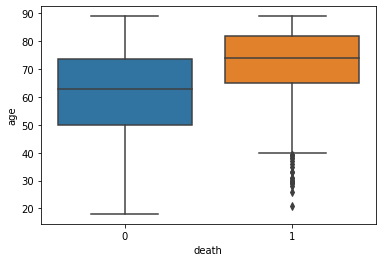

In [44]:
# Plot paperselected clinical data in relation to death
sns.boxplot(data=covid_mortality, y='age', x='death') 

In [45]:
sns.boxplot(data=covid_mortality, y='diastolicBP', x='death')

<AxesSubplot:xlabel='death', ylabel='diastolicBP'>

In [46]:
sns.boxplot(data=covid_mortality, y='systolicBP', x='death')

<AxesSubplot:xlabel='death', ylabel='systolicBP'>

In [47]:
sns.boxplot(data=covid_mortality, y='charlson_score', x='death')

<AxesSubplot:xlabel='death', ylabel='charlson_score'>

<AxesSubplot:xlabel='death', ylabel='ddimer'>

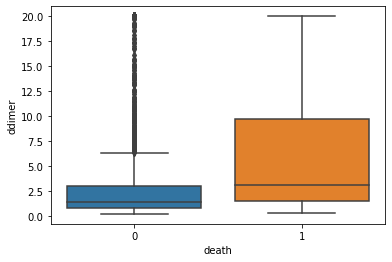

In [48]:
sns.boxplot(data=covid_mortality, y='ddimer', x='death')

<AxesSubplot:xlabel='death', ylabel='pulseOx'>

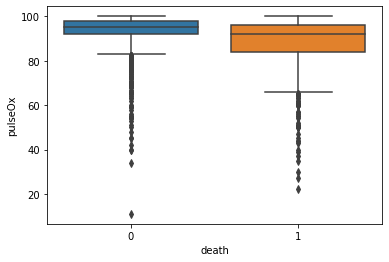

In [49]:
sns.boxplot(data=covid_mortality, y='pulseOx', x='death')

<AxesSubplot:xlabel='death', ylabel='rr'>

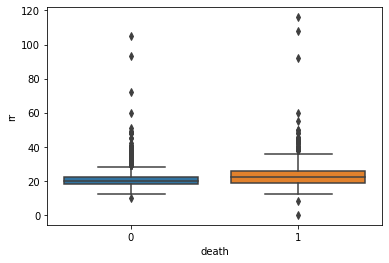

In [50]:
sns.boxplot(data=covid_mortality, y='rr', x='death')

<AxesSubplot:xlabel='death', ylabel='bun'>

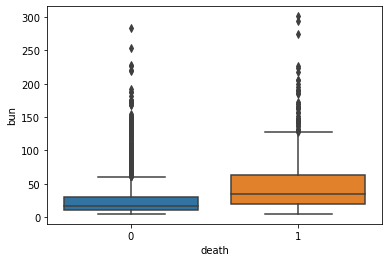

In [51]:
sns.boxplot(data=covid_mortality, y='bun', x='death')

<AxesSubplot:xlabel='death', ylabel='ldh'>

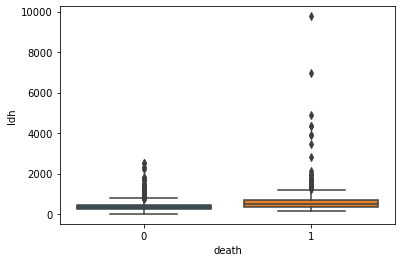

In [52]:
sns.boxplot(data=covid_mortality, y='ldh', x='death')

In [53]:
sns.boxplot(data=covid_mortality, y='troponin', x='death')

<AxesSubplot:xlabel='death', ylabel='troponin'>

In [54]:
# Look at few clinical data which seem to be important in death prediction based on literature and sorting data results from above
# Age
covid_mortality_subset.groupby(["gender","death"]).agg(["mean", "std"]) # mean age of patients died (1) is higher

age           
                   mean        std
gender death                      
F      0      61.460177  18.017684
       1      73.674208  12.790753
M      0      60.506083  15.434604
       1      71.337984  12.187352

In [55]:
# Gender
covid_mortality_subset.groupby(["gender"]).agg(["mean", "std"]) # mean death is higher in men (of 0=alive or 1=dead), even if they are younger

age                death          
             mean        std      mean       std
gender                                          
F       64.127470  17.743979  0.218379  0.413248
M       63.558322  15.382854  0.281782  0.449966

In [56]:
# And how many men and women in each group 
covid_mortality_subset[["death", "gender"]].value_counts(sort=True)  # There are more men in both groups

death  gender
0      M         1644
       F         1582
1      M          645
       F          442
dtype: int64

In [57]:
# Representation of total patients split based on gender and death
sns.countplot(x="gender", hue="death", data=covid_mortality)
plt.show()

In [58]:
# Race effect on mortality- is there higher in any groups
covid_mortality.groupby(["race"]).agg(["mean", "std"])  # it looks maybe Native Americans have higher mortality rates

age                death            \
                              mean        std      mean       std   
race                                                                
Asian                    62.592920  16.760731  0.336283  0.474541   
Black                    64.594231  15.858016  0.240385  0.427454   
Declined                 61.698565  16.356052  0.277512  0.448308   
Native_American_Alaskan  64.800000  20.364184  0.400000  0.547723   
Other                    62.352941  17.282856  0.240336  0.427407   
Other_Pacific_Islander   65.000000  10.954451  0.250000  0.500000   
White                    69.544393  14.345368  0.294393  0.456303   

                        Time_from_COVID_positive_to_death_in_days            \
                                                             mean       std   
race                                                                          
Asian                                                   10.725091  8.161690   
Black                                                    8.059996  6.435578   
Declined                                                 7.763039  6.674982   
Native_American_Alaskan                                  3.321181  1.087668   
Other                                                    8.674466  7.227819   
Other_Pacific_Islander                                   7.094444       NaN   
White                                                    8.245833  6.936712   

                        ventilator             albumin            ...  \
                              mean       std      mean       std  ...   
race                                                              ...   
Asian                     0.398230  0.661975  3.693269  0.434945  ...   
Black                     0.267308  0.588282  3.740108  0.538084  ...   
Declined                  0.313397  0.660544  3.729443  0.553527  ...   
Native_American_Alaskan   0.000000  0.000000  3.900000  0.355903  ...   
Other                     0.267227  0.590248  3.726481  0.548542  ...   
Other_Pacific_Islander    0.250000  0.500000  3.625000  0.287228  ...   
White                     0.233645  0.544583  3.653417  0.545966  ...   

                        creatine_kinase                   pro_bnp  \
                                   mean          std         mean   
race                                                                
Asian                        336.139535   503.852877  2004.803197   
Black                        990.870732  4373.450407  2467.127848   
Declined                     816.354427  4708.505482  2456.886161   
Native_American_Alaskan       81.500000    67.850325   988.500000   
Other                        365.361105   860.537771  2209.559218   
Other_Pacific_Islander      4267.500000  7850.658932  1937.000000   
White                        368.496991   758.607063  3061.078594   

                                     potassium           charlson_score  \
                                 std      mean       std           mean   
race                                                                      
Asian                    3782.836697  4.397273  0.713881       2.106195   
Black                    4415.584380  4.473922  0.810107       2.561538   
Declined                 4459.616231  4.423684  0.705251       1.892344   
Native_American_Alaskan   675.286976  4.680000  0.819756       2.200000   
Other                    4188.781030  4.395670  0.691225       2.177591   
Other_Pacific_Islander           NaN  4.600000  0.752773       1.750000   
White                    4588.479217  4.371905  0.684796       2.306075   

                                    ct_value            
                              std       mean       std  
race                                                    
Asian                    2.063124  27.534375  6.997216  
Black                    2.439005  28.051990  6.195679  
Declined                 2.152549  28.470192  6.139857  
Native_American_Alaskan  1.788854 

In [59]:
# Count how many patients are in total in each group
covid_mortality["race"].value_counts(sort=True) 

Other                      1785
Black                      1560
White                       428
Declined                    418
Asian                       113
Native_American_Alaskan       5
Other_Pacific_Islander        4
Name: race, dtype: int64

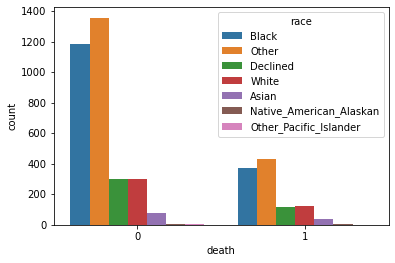

In [60]:
# Countplot of race in each group
sns.countplot(x="death", hue="race", data=covid_mortality)
plt.show()

In [61]:
# Ventilator effect
covid_mortality.groupby(["ventilator"]).agg(["mean", "std"]) 

age                death            \
                 mean        std      mean       std   
ventilator                                             
0           63.552191  17.047090  0.147347  0.354503   
1           66.116190  13.974070  0.697143  0.459932   
2           62.955836  14.379726  0.652997  0.476769   
4           70.666667   7.767453  1.000000  0.000000   

           Time_from_COVID_positive_to_death_in_days              albumin  \
                                                mean        std      mean   
ventilator                                                                  
0                                           6.571003   5.540240  3.759837   
1                                           9.636527   7.647247  3.542269   
2                                          10.588859   7.415310  3.649162   
4                                           9.325694  11.135932  3.600000   

                     diastolicBP             ... creatine_kinase               \
                 std        mean        std  ...            mean          std   
ventilator                                   ...                                
0           0.542738   70.007785  14.503720  ...      603.963409  3293.469239   
1           0.502441   58.142857  20.201291  ...      762.528761  1904.037652   
2           0.533473   57.403785  21.437008  ...      807.965909  2853.342297   
4           0.848528   47.666667   2.886751  ...     1584.500000  2194.152342   

                pro_bnp              potassium           charlson_score  \
                   mean          std      mean       std           mean   
ventilator                                                                
0           2220.713443  4210.133169  4.388595  0.710928       2.134083   
1           3042.980968  4679.856990  4.593738  0.804668       2.963810   
2           3104.911106  4704.997287  4.521154  0.845720       2.974763   
4           5176.000000  6602.963123  5.800000  1.307670       5.666667   

                       ct_value            
                 std       mean       std  
ventilator                                 
0           2.270479  28.047851  6.188757  
1           2.499738  25.674026  5.842786  
2           2.435106  27.623288  5.854569  
4           3.785939        NaN       NaN  

[4 rows x 100 columns]

In [62]:
# Count how many patients are in total in each group
covid_mortality["ventilator"].value_counts(sort=True) # more on ventilator more likely to die

0    3468
1     525
2     317
4       3
Name: ventilator, dtype: int64

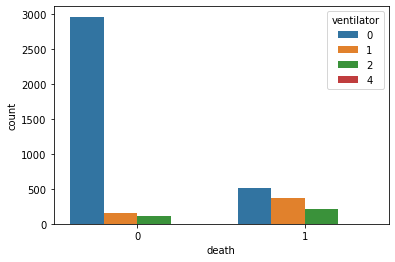

In [63]:
# Countplot of patients used  ventilator 0-4 times in each group
sns.countplot(x="death", hue="ventilator", data=covid_mortality)
plt.show()

In [64]:
# Look at the relationship with these factors among dead patients- Days from the Covid-19 positive test tlll death
covid_mortality.plot.scatter('Time_from_COVID_positive_to_death_in_days', 'age', s=4)

<AxesSubplot:xlabel='Time_from_COVID_positive_to_death_in_days', ylabel='age'>

In [65]:
# Break it down to gender representation and colour race
sns.relplot(x="Time_from_COVID_positive_to_death_in_days", y="age", data=covid_mortality, kind="scatter", col="gender", hue="race", s=50)

<AxesSubplot:xlabel='Time_from_COVID_positive_to_death_in_days', ylabel='age'>

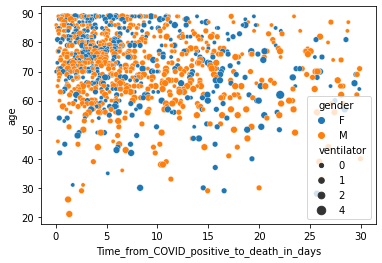

In [66]:
# Add the ventilator use into the plot
sns.scatterplot(x='Time_from_COVID_positive_to_death_in_days',y='age', data=covid_mortality, hue='gender', size='ventilator')

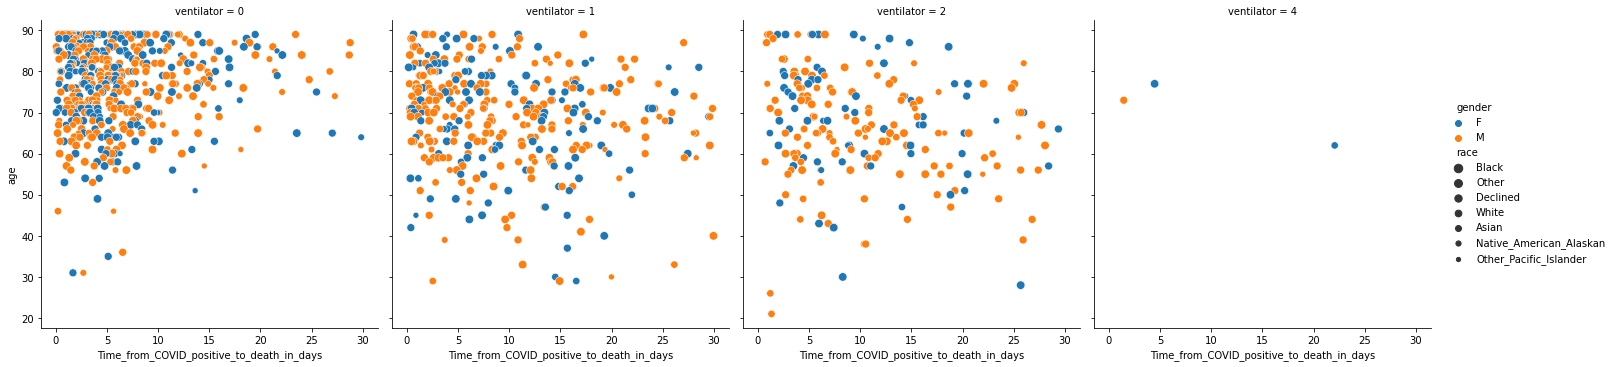

In [67]:
# Break down the use of ventilator and plot age, gender and race together to see the interrelationships
sns.relplot(x="Time_from_COVID_positive_to_death_in_days", y="age", data=covid_mortality, kind="scatter", size="race", col="ventilator", hue="gender", s=50)

### 2.2. Covid-19 history data

In [68]:
# Define function that plots time-series with these parameters
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel) 
    axes.set_ylabel(ylabel, color= color)

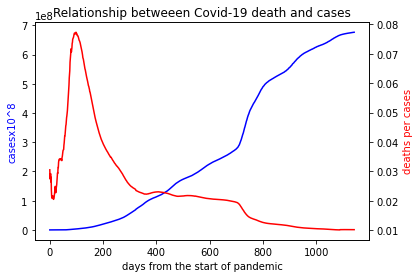

In [69]:
# and use it to plot relationship between death and cases as they progress during the Covid-19 pandemic
fig, ax = plt.subplots()
plot_timeseries(ax, covid_history.index, covid_history['cases'], 'blue', 'days from the start of pandemic', 'casesx10^8')
ax2 = ax.twinx()
plot_timeseries(ax2, covid_history.index, covid_history['deaths per cases'], 'red', 'days from the start of pandemic', 'deaths per cases')
plt.title('Relationship betweeen Covid-19 death and cases') 
plt.show()

### 2.3. Covid-19 cases worldwide datasets

In [70]:
# Looks at selected joined file from Covid-19 cases
covid_cases12_outer

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0              Afghanistan    36263.0  1269.0    25198.0  9796.0      106.0   
1                  Albania     4880.0   144.0     2745.0  1991.0      117.0   
2                  Algeria    27973.0  1163.0    18837.0  7973.0      616.0   
3                  Andorra      907.0    52.0      803.0    52.0       10.0   
4                   Angola      950.0    41.0      242.0   667.0       18.0   
..                     ...        ...     ...        ...     ...        ...   
220          New Caledonia        NaN     NaN        NaN     NaN        NaN   
221             Montserrat        NaN     NaN        NaN     NaN        NaN   
222  Caribbean Netherlands        NaN     NaN        NaN     NaN        NaN   
223       Falkland Islands        NaN     NaN        NaN     NaN        NaN   
224           Vatican City        NaN     NaN        NaN     NaN        NaN   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0          10.0           18.0                3.50                  69.49   
1           6.0           63.0                2.95                  56.25   
2           8.0          749.0                4.16                  67.34   
3           0.0            0.0                5.73                  88.53   
4           1.0            0.0                4.32                  25.47   
..          ...            ...                 ...                    ...   
220         NaN            NaN                 NaN                    NaN   
221         NaN            NaN                 NaN                    NaN   
222         NaN            NaN                 NaN                    NaN   
223         NaN            NaN                 NaN                    NaN   
224         NaN            NaN                 NaN                    NaN   

     ...  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0    ...        NaN         25840.0           NaN       9758.0   
1    ...        NaN          3155.0           NaN       2673.0   
2    ...        NaN         23238.0           NaN       9115.0   
3    ...        NaN           828.0           NaN         64.0   
4    ...        NaN           520.0           NaN        899.0   
..   ...        ...             ...           ...          ...   
220  ...        NaN            22.0           NaN          0.0   
221  ...        NaN            10.0           NaN          2.0   
222  ...        NaN             7.0           NaN          6.0   
223  ...        NaN            13.0           NaN          0.0   
224  ...        NaN            12.0           NaN          0.0   

    Serious,Critical Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0               31.0            946.0           33.0     90396.0   
1               23.0           2091.0           65.0     38997.0   
2               57.0            766.0           29.0         NaN   
3                1.0          12216.0          673.0      3750.0   
4               20.0             45.0            2.0     64747.0   
..               ...              ...            ...         ...   
220              NaN             77.0            NaN     11099.0   
221              NaN           2604.0          200.0        61.0   
222              NaN            495.0            NaN       424.0   
223              NaN           3726.0            NaN      1816.0   
224              NaN          14981.0            NaN         NaN   

     Tests/1M pop          WHO Region_y  
0          2317.0  EasternMediterranean  
1         13553.0                Europe  
2             NaN                Africa  
3         48526.0                Europe  
4          1965.0                Africa  
..            ...                   ...  
220       38839.0                   NaN  
221       12220.0                   NaN  
222       16154.0                   NaN  
223      520493.0                   NaN  
224           NaN                Europe  

[225 rows x 30 columns]

In [71]:
# Summary of columns of interest 
covid_cases12_outer[['Tot Cases/1M pop', 'Deaths/1M pop', 'Deaths / 100 Cases']].apply(np.sum) # total covid cases worldwide

Tot Cases/1M pop      664773.00
Deaths/1M pop          18453.38
Deaths / 100 Cases       564.65
dtype: float64

In [72]:
# Average values
covid_cases12_outer[['Tot Cases/1M pop', 'Deaths/1M pop', 'Deaths / 100 Cases']].apply(np.mean)

Tot Cases/1M pop      3196.024038
Deaths/1M pop           98.681176
Deaths / 100 Cases       3.019519
dtype: float64

In [73]:
# Maximum
covid_cases12_outer[['Tot Cases/1M pop', 'Deaths/1M pop', 'Deaths / 100 Cases']].apply(np.max)

Tot Cases/1M pop      39922.00
Deaths/1M pop          1238.00
Deaths / 100 Cases       28.56
dtype: float64

In [74]:
# Define function which adds column 'Pandemic_effect' and also adds description into that column 'bigger' than everage or 'smaller' than average
covid_cases12_outer['Pandemic_effect'] = covid_cases12_outer.apply(lambda x: 'bigger' if x['Tot Cases/1M pop'] > 3196.02 and x['Deaths/1M pop'] > 98.68 and x['Deaths / 100 Cases']>3.02 else 'smaller', axis=1)
covid_cases12_outer 

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0              Afghanistan    36263.0  1269.0    25198.0  9796.0      106.0   
1                  Albania     4880.0   144.0     2745.0  1991.0      117.0   
2                  Algeria    27973.0  1163.0    18837.0  7973.0      616.0   
3                  Andorra      907.0    52.0      803.0    52.0       10.0   
4                   Angola      950.0    41.0      242.0   667.0       18.0   
..                     ...        ...     ...        ...     ...        ...   
220          New Caledonia        NaN     NaN        NaN     NaN        NaN   
221             Montserrat        NaN     NaN        NaN     NaN        NaN   
222  Caribbean Netherlands        NaN     NaN        NaN     NaN        NaN   
223       Falkland Islands        NaN     NaN        NaN     NaN        NaN   
224           Vatican City        NaN     NaN        NaN     NaN        NaN   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0          10.0           18.0                3.50                  69.49   
1           6.0           63.0                2.95                  56.25   
2           8.0          749.0                4.16                  67.34   
3           0.0            0.0                5.73                  88.53   
4           1.0            0.0                4.32                  25.47   
..          ...            ...                 ...                    ...   
220         NaN            NaN                 NaN                    NaN   
221         NaN            NaN                 NaN                    NaN   
222         NaN            NaN                 NaN                    NaN   
223         NaN            NaN                 NaN                    NaN   
224         NaN            NaN                 NaN                    NaN   

     ...  TotalRecovered  NewRecovered  ActiveCases  Serious,Critical  \
0    ...         25840.0           NaN       9758.0              31.0   
1    ...          3155.0           NaN       2673.0              23.0   
2    ...         23238.0           NaN       9115.0              57.0   
3    ...           828.0           NaN         64.0               1.0   
4    ...           520.0           NaN        899.0              20.0   
..   ...             ...           ...          ...               ...   
220  ...            22.0           NaN          0.0               NaN   
221  ...            10.0           NaN          2.0               NaN   
222  ...             7.0           NaN          6.0               NaN   
223  ...            13.0           NaN          0.0               NaN   
224  ...            12.0           NaN          0.0               NaN   

    Tot Cases/1M pop Deaths/1M pop  TotalTests  Tests/1M pop  \
0              946.0          33.0     90396.0        2317.0   
1             2091.0          65.0     38997.0       13553.0   
2              766.0          29.0         NaN           NaN   
3            12216.0         673.0      3750.0       48526.0   
4               45.0           2.0     64747.0        1965.0   
..               ...           ...         ...           ...   
220             77.0           NaN     11099.0       38839.0   
221           2604.0         200.0        61.0       12220.0   
222            495.0           NaN       424.0       16154.0   
223           3726.0           NaN      1816.0      520493.0   
224          14981.0           NaN         NaN           NaN   

             WHO Region_y  Pandemic_effect  
0    EasternMediterranean          smaller  
1                  Europe          smaller  
2                  Africa          smaller  
3                  Europe           bigger  
4                  Africa          smaller  
..                    ...              ...  
220                   NaN          smaller  
221                   NaN          smaller  
222                   NaN          smaller  
223                   NaN          smaller

In [75]:
# Select columns of interest
covid_cases12_outer2 = covid_cases12_outer[['Country/Region', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Deaths / 100 Cases', 'Pandemic_effect']]

In [76]:
# Drop null values
covid_cases12_outer3 = covid_cases12_outer2.dropna()
covid_cases12_outer3

Country/Region  Tot Cases/1M pop  Deaths/1M pop  Deaths / 100 Cases  \
0       Afghanistan             946.0           33.0                3.50   
1           Albania            2091.0           65.0                2.95   
2           Algeria             766.0           29.0                4.16   
3           Andorra           12216.0          673.0                5.73   
4            Angola              45.0            2.0                4.32   
..              ...               ...            ...                 ...   
181         Vietnam               8.0            0.1                0.00   
183  Western Sahara              17.0            2.0               10.00   
184           Yemen              59.0           17.0               28.56   
185          Zambia             389.0           11.0                3.08   
186        Zimbabwe             292.0            6.0                1.33   

    Pandemic_effect  
0           smaller  
1           smaller  
2           smaller  
3            bigger  
4           smaller  
..              ...  
181         smaller  
183         smaller  
184         smaller  
185         smaller  
186         smaller  

[159 rows x 5 columns]

In [77]:
# Sort values
covid_cases12_outer3.sort_values(['Deaths/1M pop', 'Deaths / 100 Cases', 'Tot Cases/1M pop'], ascending=[False, False, False]) 

Country/Region  Tot Cases/1M pop  Deaths/1M pop  Deaths / 100 Cases  \
143        San Marino           20596.0        1238.00                6.01   
16            Belgium            6137.0         850.00               14.79   
3             Andorra           12216.0         673.00                5.73   
132              Peru           13793.0         619.00                4.73   
157             Spain            7582.0         610.00               10.44   
..                ...               ...            ...                 ...   
139            Rwanda             163.0           0.40                0.27   
130  Papua New Guinea              18.0           0.30                0.00   
174            Uganda              27.0           0.10                0.18   
181           Vietnam               8.0           0.10                0.00   
28            Burundi              33.0           0.08                0.26   

    Pandemic_effect  
143          bigger  
16           bigger  
3            bigger  
132          bigger  
157          bigger  
..              ...  
139         smaller  
130         smaller  
174         smaller  
181         smaller  
28          smaller  

[159 rows x 5 columns]

# 4. MACHINE LEARNING

In [78]:
# Model 1. 
# This is prepared dataset with selected 10 clinical features from Ikemura et al.
covid_paperselected_MLfinal

age  diastolicBP  systolicBP   ddimer  pulseOx    rr    bun    ldh  \
2      89           61         126  0.26999    100.0  26.0   99.0  386.0   
3      89           56         113  2.02000     96.0  20.0   65.0  260.0   
5      89           63         108  0.49000     95.0  18.0  142.0  363.0   
6      89            0           0  6.21000     97.0  20.0   34.0  506.0   
10     89           62         108  1.16000     99.0  18.0   28.0  182.0   
...   ...          ...         ...      ...      ...   ...    ...    ...   
4306   19           73         116  0.86000     97.0  20.0   20.0  463.0   
4308   19           64         106  0.75000     97.0  22.0   14.0  411.0   
4309   19           68         100  6.13000     98.0  18.0    5.0  226.0   
4310   18           65         104  0.27000     99.0  18.0   12.0  237.0   
4311   18           75         114  0.40000     98.0  18.0   24.0  157.0   

      troponin  charlson_score  death  
2         0.03               0      0  
3         0.02               5      0  
5         0.05               4      0  
6         0.30               4      1  
10        0.01               0      0  
...        ...             ...    ...  
4306      0.01               1      0  
4308      0.01               2      0  
4309      0.01               0      0  
4310      0.01               0      0  
4311      0.01               0      0  

[2293 rows x 11 columns]

In [79]:
# Model - predict death (1=yes, 0=no based on the 10 clinical parameters)
sns.pairplot(covid_paperselected_MLfinal, hue='death')

In [80]:
# Machine learning model- we want classification to predict if patient lives or dies based on clinical parameters
X = covid_paperselected_MLfinal.iloc[:,0:10]
y = covid_paperselected_MLfinal.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [81]:
# Decision tree clasifier
clf = DecisionTreeClassifier()

In [82]:
clf = clf.fit(X_train,y_train)

In [83]:
print(tree.export_text(clf))

|--- feature_1 <= 49.50
|   |--- feature_2 <= 95.50
|   |   |--- feature_7 <= 231.50
|   |   |   |--- feature_9 <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  4.50
|   |   |   |   |--- class: 1
|   |   |--- feature_7 >  231.50
|   |   |   |--- feature_6 <= 11.50
|   |   |   |   |--- feature_4 <= 86.50
|   |   |   |   |   |--- feature_4 <= 78.50
|   |   |   |   |   |   |--- feature_9 <= 2.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_9 >  2.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  78.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  86.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  11.50
|   |   |   |   |--- feature_3 <= 0.79
|   |   |   |   |   |--- feature_3 <= 0.68
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  0.68
|   |   |   |   |   |   |--- feature_9 <= 3.00
|   |   |   |   |   |   |   |--- class: 0
|   |   | 

In [84]:
# Making predictions
y_pred = clf.predict(X_test)

In [85]:
accuracy_score(y_test, y_pred)

0.8300653594771242

In [86]:
# Confusion matrix 
print(confusion_matrix(y_test, y_pred))

[[316  34]
 [ 44  65]]


In [87]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       350
           1       0.66      0.60      0.62       109

    accuracy                           0.83       459
   macro avg       0.77      0.75      0.76       459
weighted avg       0.83      0.83      0.83       459



In [88]:
# K Nearest Neighbours
knn = KNeighborsClassifier() 
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8518518518518519

In [89]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis() 

In [90]:
lda = lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy_score(y_test, y_pred)

0.8671023965141612

In [91]:
# Naive Bayes
nb = GaussianNB() 
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.8387799564270153

In [92]:
# K-Fold Cross Validation to make sure I was not just lucky, average of 10 tests
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(lda, X_train, y_train, cv=kfold, scoring='accuracy')

In [93]:
# Final result - model performance
cv_results.mean()

0.8566019244476122

In [94]:
# Model 2
# I selected clinical parameters based on data analysis of results - same process as with the first dataset, I have to remove null values here as well
covid_selected_ML= covid_mortality[["age", "ventilator", "diastolicBP", "systolicBP", "egfr", "ferritin", "mpv", "tnf", "charlson_score", "ct_value", "death"]]
covid_selected_ML

age  ventilator  diastolicBP  systolicBP     egfr  ferritin   mpv  tnf  \
0      89           0           70         128   22.000     817.0  11.6  NaN   
1      89           0           97         124   28.000       NaN   9.9  NaN   
2      89           0           61         126   21.000     512.0  14.7  NaN   
3      89           0           56         113   42.000     367.0  12.6  NaN   
4      89           0           62         114   43.000     255.0  10.0  NaN   
...   ...         ...          ...         ...      ...       ...   ...  ...   
4308   19           0           64         106  116.000     763.0  10.7  NaN   
4309   19           0           68         100  120.001      23.0   9.7  NaN   
4310   18           0           65         104  120.001     343.0  12.8  NaN   
4311   18           0           75         114   60.000     284.0  11.8  NaN   
4312   18           0           83         138      NaN       NaN  11.7  NaN   

      charlson_score  ct_value  death  
0                  5       NaN      1  
1                  6      34.0      1  
2                  0       NaN      0  
3                  5       NaN      0  
4                  5       NaN      0  
...              ...       ...    ...  
4308               2       NaN      0  
4309               0       NaN      0  
4310               0       NaN      0  
4311               0       NaN      0  
4312               0       NaN      0  

[4313 rows x 11 columns]

In [95]:
# Check for null values
covid_selected_ML.isnull().sum() 

age                  0
ventilator           0
diastolicBP          0
systolicBP           0
egfr               180
ferritin          1908
mpv                152
tnf               4305
charlson_score       0
ct_value          3225
death                0
dtype: int64

In [96]:
# Check shape
covid_selected_ML.shape

(4313, 11)

In [97]:
# tnf and ct_value has too many missing values- take out as there would be not many patients left
covid_selected1_ML= covid_mortality[["age", "ventilator", "diastolicBP", "systolicBP", "egfr", "ferritin", "mpv", "charlson_score", "death"]]
covid_selected1_ML.shape 

(4313, 9)

In [98]:
# Drop null values
covid_selected1_MLfinal = covid_selected1_ML.dropna()
covid_selected1_MLfinal.shape

(2351, 9)

In [99]:
# Double check nulls are gone
covid_selected1_MLfinal.isnull().sum() 

age               0
ventilator        0
diastolicBP       0
systolicBP        0
egfr              0
ferritin          0
mpv               0
charlson_score    0
death             0
dtype: int64

In [100]:
# Finalized dataset
covid_selected1_MLfinal

age  ventilator  diastolicBP  systolicBP     egfr  ferritin   mpv  \
0      89           0           70         128   22.000     817.0  11.6   
2      89           0           61         126   21.000     512.0  14.7   
3      89           0           56         113   42.000     367.0  12.6   
4      89           0           62         114   43.000     255.0  10.0   
5      89           0           63         108   28.000     689.0  12.8   
...   ...         ...          ...         ...      ...       ...   ...   
4306   19           0           73         116  112.000    2909.0   9.0   
4308   19           0           64         106  116.000     763.0  10.7   
4309   19           0           68         100  120.001      23.0   9.7   
4310   18           0           65         104  120.001     343.0  12.8   
4311   18           0           75         114   60.000     284.0  11.8   

      charlson_score  death  
0                  5      1  
2                  0      0  
3                  5      0  
4                  5      0  
5                  4      0  
...              ...    ...  
4306               1      0  
4308               2      0  
4309               0      0  
4310               0      0  
4311               0      0  

[2351 rows x 9 columns]

In [101]:
# Model
sns.pairplot(covid_selected1_MLfinal, hue='death')

In [102]:
# Now I continue same testing as with the previous selection
X = covid_selected1_MLfinal.iloc[:,0:8]
y = covid_selected1_MLfinal.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [103]:
clf = DecisionTreeClassifier()

In [104]:
clf = clf.fit(X_train,y_train)

In [105]:
print(tree.export_text(clf))

|--- feature_3 <= 93.50
|   |--- feature_3 <= 88.50
|   |   |--- feature_0 <= 53.50
|   |   |   |--- feature_3 <= 79.50
|   |   |   |   |--- feature_3 <= 43.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  43.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  79.50
|   |   |   |   |--- feature_3 <= 86.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  86.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  53.50
|   |   |   |--- feature_4 <= 3.50
|   |   |   |   |--- feature_7 <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  3.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  3.50
|   |   |   |   |--- feature_7 <= 6.50
|   |   |   |   |   |--- feature_5 <= 1163.50
|   |   |   |   |   |   |--- feature_5 <= 1116.50
|   |   |   |   |   |   |   |--- feature_0 <= 67.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 32.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 1.5

In [106]:
y_pred = clf.predict(X_test)

In [107]:
accuracy_score(y_test, y_pred)

0.8067940552016986

In [108]:
print(confusion_matrix(y_test, y_pred))

[[305  48]
 [ 43  75]]


In [109]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       353
           1       0.61      0.64      0.62       118

    accuracy                           0.81       471
   macro avg       0.74      0.75      0.75       471
weighted avg       0.81      0.81      0.81       471



In [110]:
knn = KNeighborsClassifier() 
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8089171974522293

In [111]:
lda = LinearDiscriminantAnalysis() 

In [112]:
lda = lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy_score(y_test, y_pred)

0.8789808917197452

In [113]:
nb = GaussianNB() 
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.832271762208068

In [114]:
# K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(lda, X_train, y_train, cv=kfold, scoring='accuracy')

In [115]:
cv_results.mean()

0.8664893617021278

In [116]:
# Model 3
# Now I select only 4 overlappig clinical features between my selection and paper selection datasets
covid_commonselected_ML= covid_mortality[["age", "diastolicBP", "systolicBP", "charlson_score", "death"]]
print(covid_commonselected_ML.head())

   age  diastolicBP  systolicBP  charlson_score  death
0   89           70         128               5      1
1   89           97         124               6      1
2   89           61         126               0      0
3   89           56         113               5      0
4   89           62         114               5      0


In [117]:
# Check null values 
covid_commonselected_ML.isnull().sum()

age               0
diastolicBP       0
systolicBP        0
charlson_score    0
death             0
dtype: int64

In [118]:
# Look at shape
print(covid_commonselected_ML.shape)

(4313, 5)


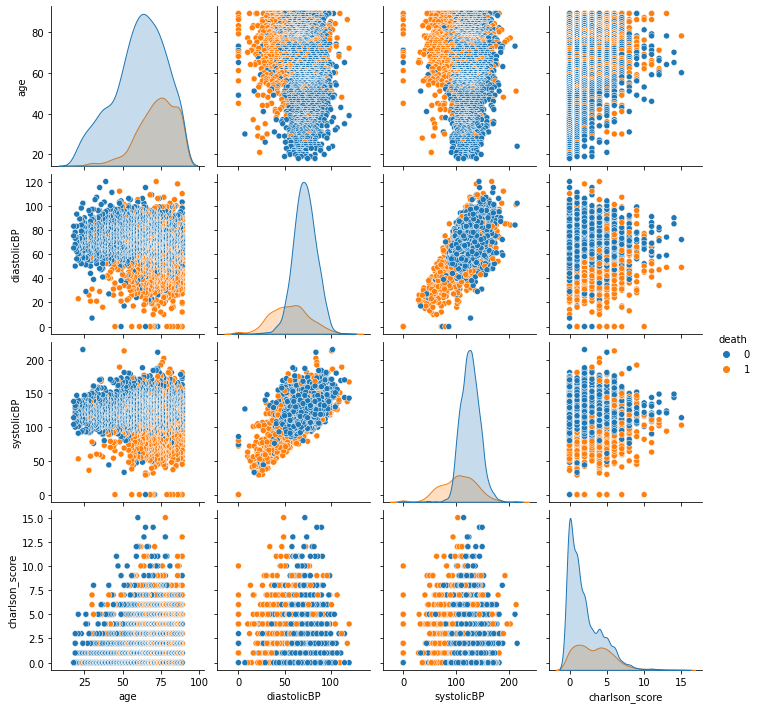

In [119]:
# Model
sns.pairplot(covid_commonselected_ML, hue='death')

In [120]:
# Same tests as before
X = covid_commonselected_ML.iloc[:,0:4]
y = covid_commonselected_ML.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [121]:
clf = DecisionTreeClassifier()

In [122]:
clf = clf.fit(X_train,y_train)

In [123]:
print(tree.export_text(clf))

|--- feature_2 <= 94.50
|   |--- feature_0 <= 53.50
|   |   |--- feature_2 <= 79.50
|   |   |   |--- feature_2 <= 48.50
|   |   |   |   |--- feature_2 <= 16.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  16.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  48.50
|   |   |   |   |--- feature_3 <= 7.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  7.00
|   |   |   |   |   |--- class: 0
|   |   |--- feature_2 >  79.50
|   |   |   |--- feature_1 <= 53.50
|   |   |   |   |--- feature_2 <= 86.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  86.50
|   |   |   |   |   |--- feature_0 <= 34.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  34.00
|   |   |   |   |   |   |--- feature_2 <= 93.50
|   |   |   |   |   |   |   |--- feature_0 <= 50.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  50.50
|   |   |   |   |   |   |   |   |--- feature

In [124]:
y_pred = clf.predict(X_test)

In [125]:
accuracy_score(y_test, y_pred)

0.7705677867902665

In [126]:
print(confusion_matrix(y_test, y_pred))

[[541  99]
 [ 99 124]]


In [127]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       640
           1       0.56      0.56      0.56       223

    accuracy                           0.77       863
   macro avg       0.70      0.70      0.70       863
weighted avg       0.77      0.77      0.77       863



In [128]:
knn = KNeighborsClassifier() 
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8261877172653534

In [129]:
lda = LinearDiscriminantAnalysis() 

In [130]:
lda = lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy_score(y_test, y_pred)

0.8238702201622248

In [131]:
nb = GaussianNB() 
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.831981460023175

In [132]:
# K-Fold Cross Validation 
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(lda, X_train, y_train, cv=kfold, scoring='accuracy')

In [133]:
cv_results.mean()

0.8315942028985507